In [ ]:
!pip install git+https://github.com/aimclub/eXplain-NNs &> /dev/null
!wget https://raw.githubusercontent.com/aimclub/eXplain-NNs/main/requirements.txt
!pip install -r requirements.txt

--2024-01-08 20:16:48--  https://raw.githubusercontent.com/aimclub/eXplain-NNs/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1486 (1.5K) [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]   1.45K  --.-KB/s    in 0s      

2024-01-08 20:16:48 (21.8 MB/s) - ‘requirements.txt.1’ saved [1486/1486]



In [ ]:
import eXNN.bayes
import eXNN.topology
import eXNN.visualization

from collections import OrderedDict
import torch
import torch.nn as nn

2024-01-08 20:17:35.792130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 20:17:35.792303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 20:17:35.964758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 20:17:36.270625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 20:17:41.039083: W tensorflow/compiler/tf2

In [ ]:
N = 20
dim = 256
data = torch.randn((N, dim))


layers = ['second_layer', 'third_layer']
model = nn.Sequential(
   OrderedDict([
       ('first_layer', nn.Linear(256, 128)),
       ('second_layer', nn.Linear(128, 64)),
       ('third_layer', nn.Linear(64, 10))
   ])
)

# visualization

In [ ]:
visualization = eXNN.visualization.visualize_layer_manifolds(model, 'umap', data, layers=layers)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [ ]:
visualization

{'input': <Figure size 640x480 with 1 Axes>,
 'second_layer': <Figure size 640x480 with 1 Axes>,
 'third_layer': <Figure size 640x480 with 1 Axes>}

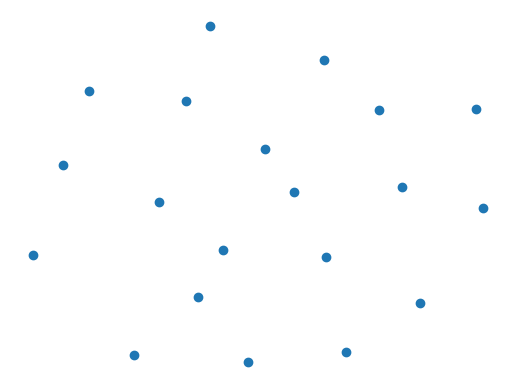

In [ ]:
visualization['input']

# topology

In [ ]:
barcode = eXNN.topology.get_data_barcode(data, 'standard', '3')

In [ ]:
barcode

{'H0': [(0.0, 20.427871704101562),
  (0.0, 20.545785903930664),
  (0.0, 20.72137451171875),
  (0.0, 20.729244232177734),
  (0.0, 20.788145065307617),
  (0.0, 20.885828018188477),
  (0.0, 20.979244232177734),
  (0.0, 21.090167999267578),
  (0.0, 21.144350051879883),
  (0.0, 21.244359970092773),
  (0.0, 21.267318725585938),
  (0.0, 21.423004150390625),
  (0.0, 21.456178665161133),
  (0.0, 21.54694938659668),
  (0.0, 21.78574562072754),
  (0.0, 21.987905502319336),
  (0.0, 22.15070915222168),
  (0.0, 22.419517517089844),
  (0.0, 22.577720642089844)]}

In [ ]:
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers, 'standard', '3')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1033: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1033: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.



In [ ]:
barcodes

{'second_layer': {'H0': [(0.0, 2.7295398712158203),
   (0.0, 2.879115581512451),
   (0.0, 2.8944084644317627),
   (0.0, 2.9289960861206055),
   (0.0, 2.9594507217407227),
   (0.0, 2.9614882469177246),
   (0.0, 3.0176868438720703),
   (0.0, 3.024463176727295),
   (0.0, 3.0528640747070312),
   (0.0, 3.071146011352539),
   (0.0, 3.091641664505005),
   (0.0, 3.1820671558380127),
   (0.0, 3.2134368419647217),
   (0.0, 3.2210047245025635),
   (0.0, 3.221735715866089),
   (0.0, 3.3770668506622314),
   (0.0, 3.3806467056274414),
   (0.0, 3.426661729812622),
   (0.0, 3.453120231628418)]},
 'third_layer': {'H0': [(0.0, 0.42265862226486206),
   (0.0, 0.4385974407196045),
   (0.0, 0.45529910922050476),
   (0.0, 0.47055307030677795),
   (0.0, 0.5031191110610962),
   (0.0, 0.5314600467681885),
   (0.0, 0.5321067571640015),
   (0.0, 0.5378237366676331),
   (0.0, 0.5516778826713562),
   (0.0, 0.555736780166626),
   (0.0, 0.5763639211654663),
   (0.0, 0.5769542455673218),
   (0.0, 0.5827254056930542),


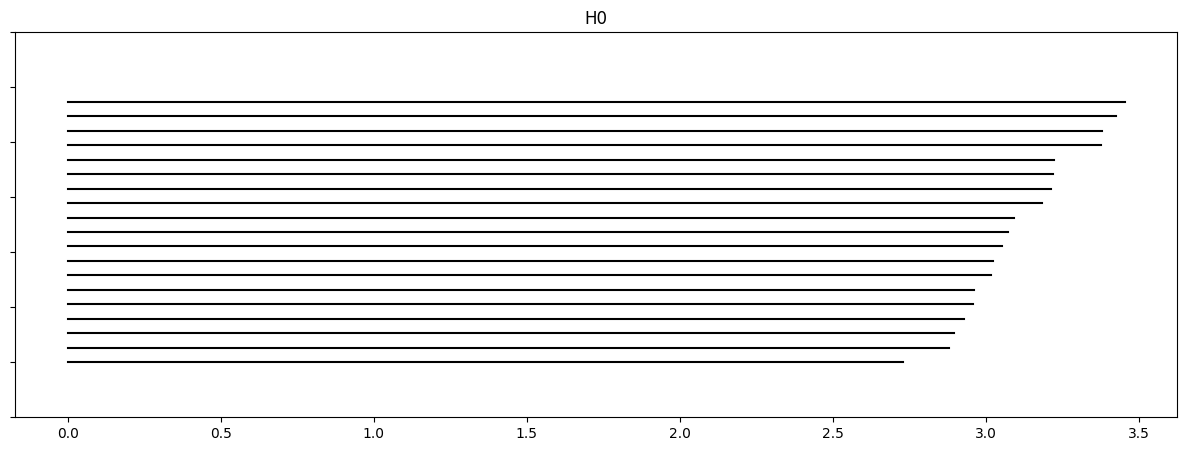

In [ ]:
barcode_image = eXNN.topology.plot_barcode(barcodes['second_layer'])
barcode_image

In [ ]:
barcode_metrics = eXNN.topology.evaluate_barcode(barcodes['second_layer'])
barcode_metrics

/usr/local/lib/python3.10/dist-packages/eXNN/topology/metrics.py:128: RuntimeWarning:

divide by zero encountered in double_scalars



{'max_length': 3.453120231628418,
 'mean_length': 3.1098179315265857,
 'median_length': 3.071146011352539,
 'stdev_length': 0.1981824717493403,
 'sum_length': 59.08654069900513,
 'ratio_2_1': 1.255399038478336,
 'ratio_3_1': 1.2385408768993722,
 'h': 2.9424123930235555,
 'normh': 0.7213557521489085,
 'snr': inf,
 'mean_birth': 0.0,
 'stdev_birth': 0.0,
 'mean_death': 3.1098179315265857,
 'stdev_death': 0.1981824717493403}

# bayes

In [ ]:
n_iter = 10
bayes_prediction_dropout = eXNN.bayes.DropoutBayesianWrapper(model, mode='basic', p=0.5).predict(data, n_iter=n_iter)
bayes_prediction_gaussian = eXNN.bayes.GaussianBayesianWrapper(model, sigma=0.1).predict(data, n_iter=n_iter)

In [ ]:
bayes_prediction_dropout

{'mean': tensor([[ 0.0524, -0.7637, -0.2605, -0.3013,  0.1184,  0.3332,  0.0087,  0.2980,
           0.1924, -0.0986],
         [ 0.1648, -0.4532,  0.2062,  0.2173, -0.0319,  0.0422, -0.1366, -0.1176,
           0.2258,  0.1209],
         [-0.1035, -0.0898, -0.1028, -0.1225, -0.0868, -0.0451, -0.3171, -0.3977,
           0.0318,  0.0952],
         [ 0.0535,  0.0728,  0.1425,  0.2463,  0.0174, -0.1424,  0.1791,  0.1176,
           0.1372,  0.3334],
         [ 0.0413,  0.0627,  0.2778,  0.2024,  0.0452,  0.2347,  0.1330, -0.0349,
           0.0279, -0.3920],
         [ 0.0932, -0.8167, -0.0929, -0.3795,  0.3092, -0.1150, -0.3898,  0.0960,
          -0.0881, -0.0695],
         [-0.2639, -0.2020,  0.0227,  0.3017, -0.1535,  0.2212, -0.1198,  0.3751,
          -0.2268, -0.2620],
         [-0.0614, -0.2795,  0.2760, -0.2200, -0.1044,  0.4488, -0.0426,  0.2994,
          -0.1257,  0.1195],
         [ 0.0339,  0.0116,  0.2129, -0.0378, -0.0128, -0.0707,  0.1100, -0.0420,
           0.1022, -0.

In [ ]:
bayes_prediction_gaussian

{'mean': tensor([[ 0.2380, -0.1675,  0.3582, -0.2291, -0.0823,  0.3963,  0.8785,  0.1269,
          -0.1608,  0.3050],
         [-0.8981, -0.4616,  0.1604,  0.8160,  0.9168,  0.0958,  0.6010, -0.1087,
           1.6693, -0.4826],
         [ 0.6127, -0.1056, -0.2083, -0.3089, -0.1137, -0.5329, -0.4268, -1.5071,
          -0.4658,  0.6184],
         [ 0.2783, -0.7734,  0.3739,  0.3529, -0.9197, -0.0654, -0.2544, -0.1875,
          -1.3133, -0.1486],
         [ 1.2959, -0.0172,  1.2728, -0.0436, -0.2324,  0.1645,  0.5214, -1.5777,
          -0.6640, -0.4915],
         [ 0.1287,  0.2557, -0.4060, -0.9901,  1.0086,  0.2907,  0.1412, -0.7980,
           0.1623,  0.1240],
         [ 0.0135, -1.5393,  0.1007,  0.5849, -0.5386, -1.0181, -0.4745,  0.1836,
          -0.0041, -0.2100],
         [ 1.6184, -0.1806, -0.7972, -1.2243, -0.9231,  0.2074, -0.8049, -0.5739,
           0.4971, -0.0142],
         [ 0.0353, -0.0644, -0.6644,  0.3560,  0.3451, -0.4390,  0.5680, -1.0739,
           0.7734,  0.